In [1]:
import numpy as np
import os
import pandas as pd
import logging
import time
import csv
import glob
import sys
import shutil
import json
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Set, List, Dict
import functools
import string

import sox
import logging
import pydub 
from pydub.playback import play

In [3]:
sns.set(font_scale=1.4)

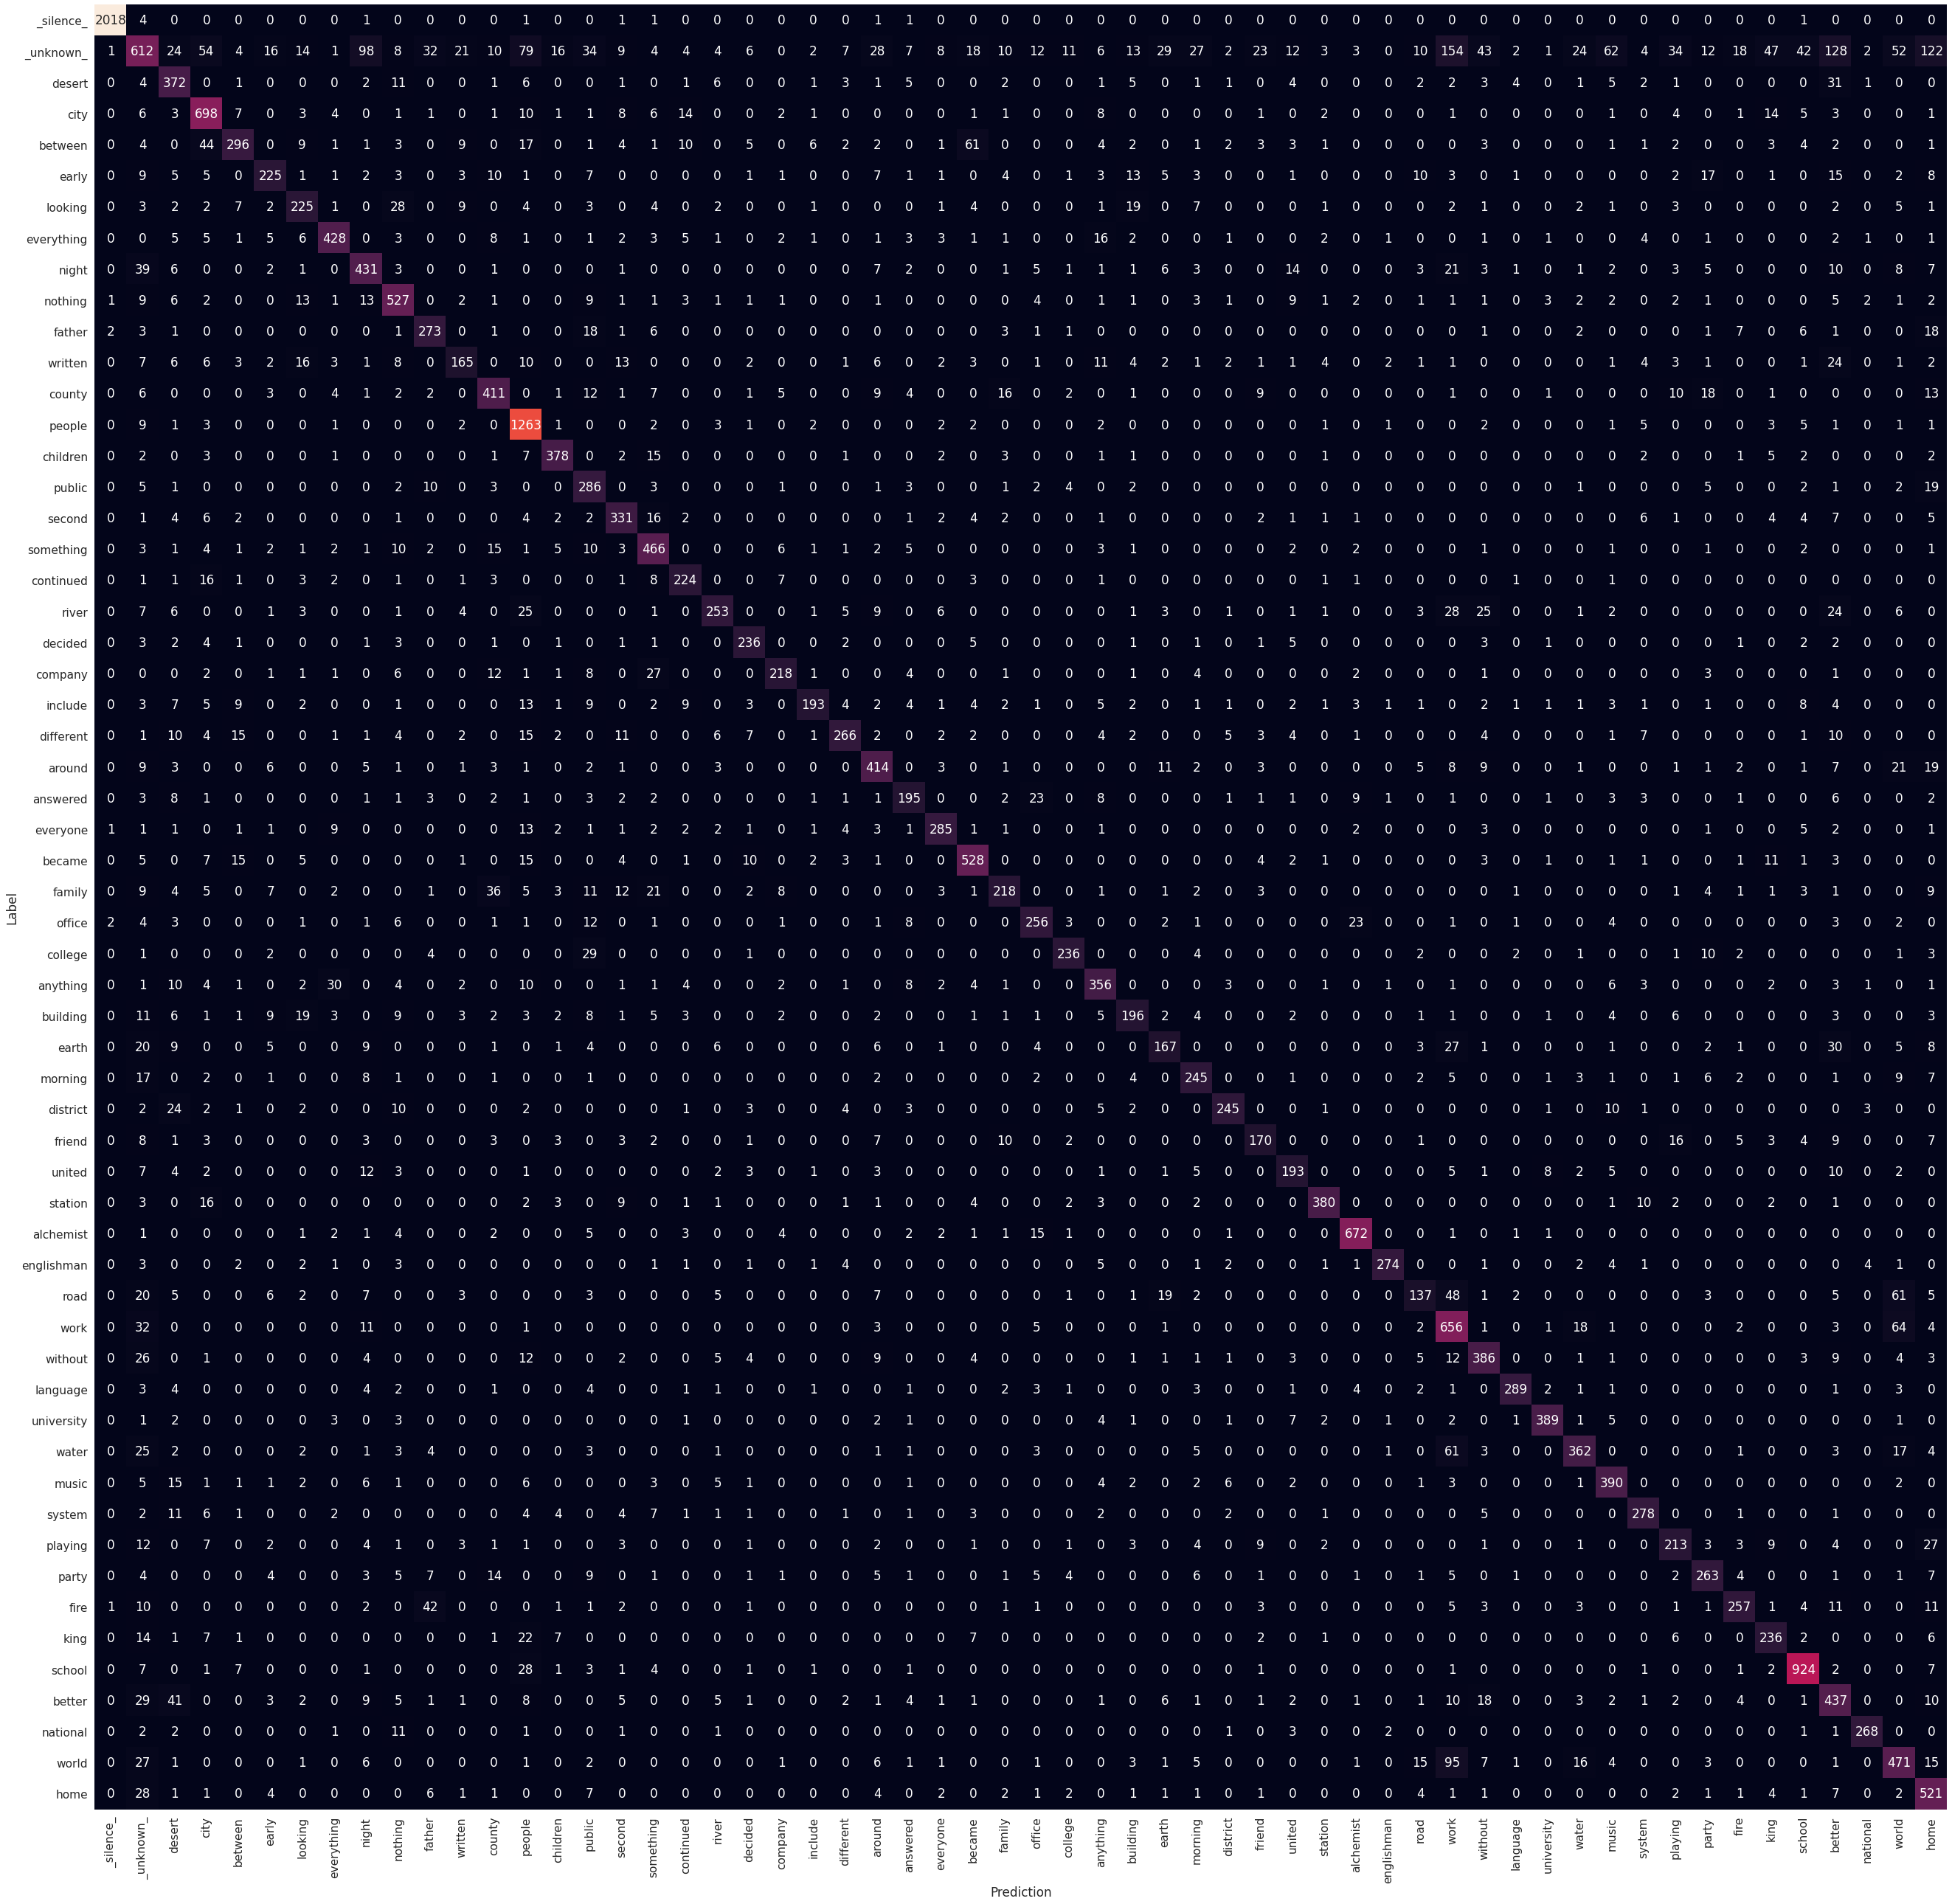

In [5]:
confusion_mtx = np.load("../train_56/test_conf_matrix.npy")

commands = ["_silence_", "_unknown_"] + "desert,city,between,early,looking,everything,night,nothing,father,written,county,people,children,public,second,something,continued,river,decided,company,include,different,around,answered,everyone,became,family,office,college,anything,building,earth,morning,district,friend,united,station,alchemist,englishman,road,work,without,language,university,water,music,system,playing,party,fire,king,school,better,national,world,home".split(",")
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g', cbar=False)
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.gcf().set_size_inches(45,45)

In [ ]:
confusionfile = "/home/mark/tinyspeech_harvard/tinyspeech_images/confusion.txt"
with open(confusionfile, 'r') as fh:
    txt = 

In [139]:
arr = """ 
 [[246   0   0   0   2   0   2]
 [  1  89  40  32  45  31  12]
 [  1   3 187   5   9   0   0]
 [  0   4   5 187   2   3   4]
 [  0   1  14   0 158  11   1]
 [  0   3   4   1  15 190   0]
 [  0   1   2   7   1   0 180]]
"""

In [141]:
q = arr.replace("[", "").replace("]", "")
# https://stackoverflow.com/a/58307640
# normally \n +1, but with blockquote, hokey, accounts for the line above and below
rows = q.count('\n') -1
print(rows)
confusion_mtx = np.fromstring(q, sep=' ').reshape(-1, rows)
confusion_mtx

7


array([[246.,   0.,   0.,   0.,   2.,   0.,   2.],
       [  1.,  89.,  40.,  32.,  45.,  31.,  12.],
       [  1.,   3., 187.,   5.,   9.,   0.,   0.],
       [  0.,   4.,   5., 187.,   2.,   3.,   4.],
       [  0.,   1.,  14.,   0., 158.,  11.,   1.],
       [  0.,   3.,   4.,   1.,  15., 190.,   0.],
       [  0.,   1.,   2.,   7.,   1.,   0., 180.]])

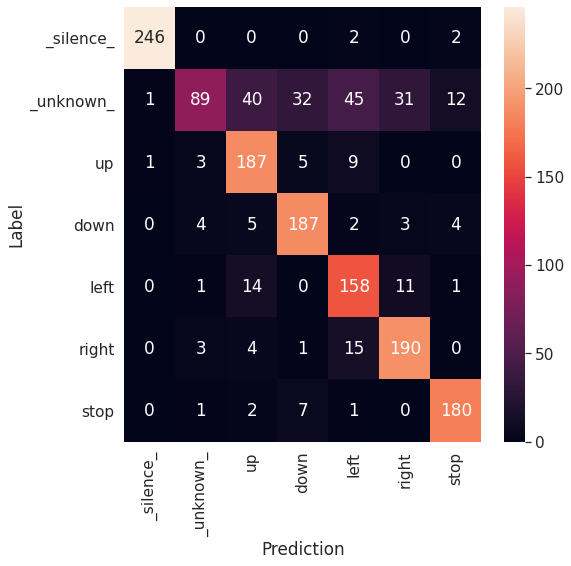

In [142]:
commands = ["_silence_", "_unknown_", "up", "down", "left", "right", "stop"]
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.gcf().set_size_inches(8,8)

8


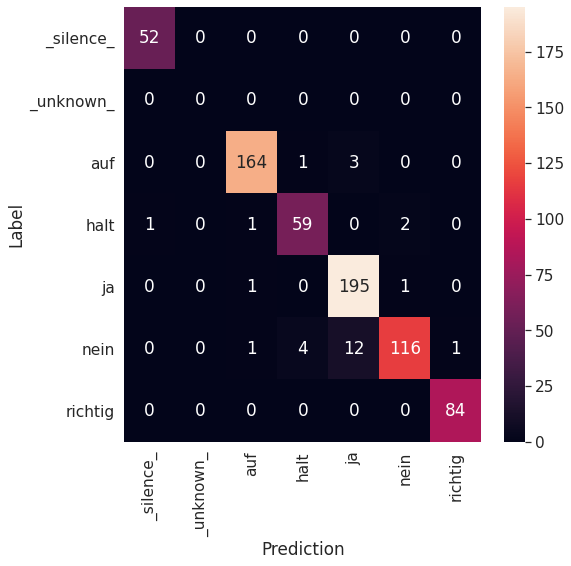

In [136]:
arr = """
 [[ 52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0 164   1   3   0   0]
 [  1   0   1  59   0   2   0]
 [  0   0   1   0 195   1   0]
 [  0   0   1   4  12 116   1]
 [  0   0   0   0   0   0  84]]
"""
q = arr.replace("[", "").replace("]", "")
# https://stackoverflow.com/a/58307640
# normally \n +1, but with blockquote, hokey, accounts for the line above and below
rows = q.count('\n')
print(rows)
confusion_mtx = np.fromstring(q, sep=' ').reshape(-1, 7)
commands = ["_silence_", "_unknown_", "auf", "halt", "ja", "nein", "richtig"]
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.gcf().set_size_inches(8,8)

8


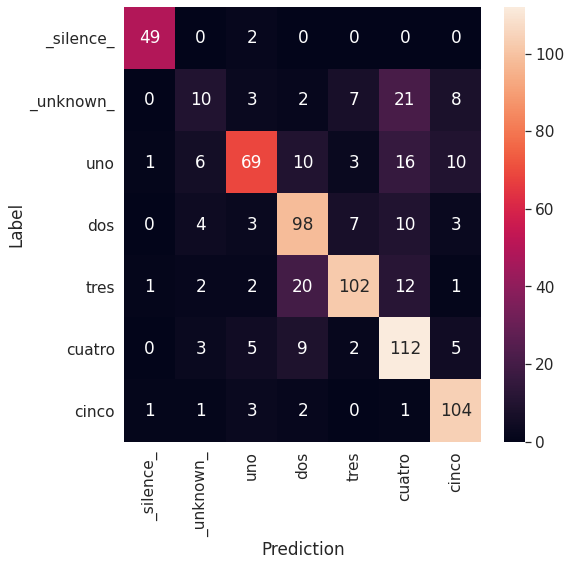

In [138]:
arr = """
 [[ 49   0   2   0   0   0   0]
 [  0  10   3   2   7  21   8]
 [  1   6  69  10   3  16  10]
 [  0   4   3  98   7  10   3]
 [  1   2   2  20 102  12   1]
 [  0   3   5   9   2 112   5]
 [  1   1   3   2   0   1 104]]
"""
q = arr.replace("[", "").replace("]", "")
# https://stackoverflow.com/a/58307640
# normally \n +1, but with blockquote, hokey, accounts for the line above and below
rows = q.count('\n')
print(rows)
confusion_mtx = np.fromstring(q, sep=' ').reshape(-1, 7)
commands = ["_silence_", "_unknown_", "uno", "dos", "tres", "cuatro", "cinco"]
sns.heatmap(confusion_mtx, xticklabels=commands, yticklabels=commands, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.gcf().set_size_inches(8,8)

move `markstats` to new dir each time since `test_streaming_accuracy.py` uses file appending

In [20]:
# !cat "../alignment_processing_en/train_5_11_silencepad/markstats/stats.csv"
!cat "../alignment_processing_en/train_5_11_silencepad/run2/stats.csv"

0.1,186.0,0.0,0.57
0.2,186.0,0.0,0.565
0.3,96.0,0.045,0.585
0.4,24.0,0.165,0.565
0.5,6.0,0.335,0.46
0.6,6.0,0.525,0.365
0.7,0.0,0.7,0.23
0.8,0.0,0.87,0.105
0.9,0.0,0.96,0.035
1.0,0.0,1.0,0.0


In [21]:
data = np.genfromtxt("../alignment_processing_en/train_5_11_silencepad/run2/stats.csv", delimiter=',')

In [22]:
data

array([[1.00e-01, 1.86e+02, 0.00e+00, 5.70e-01],
       [2.00e-01, 1.86e+02, 0.00e+00, 5.65e-01],
       [3.00e-01, 9.60e+01, 4.50e-02, 5.85e-01],
       [4.00e-01, 2.40e+01, 1.65e-01, 5.65e-01],
       [5.00e-01, 6.00e+00, 3.35e-01, 4.60e-01],
       [6.00e-01, 6.00e+00, 5.25e-01, 3.65e-01],
       [7.00e-01, 0.00e+00, 7.00e-01, 2.30e-01],
       [8.00e-01, 0.00e+00, 8.70e-01, 1.05e-01],
       [9.00e-01, 0.00e+00, 9.60e-01, 3.50e-02],
       [1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00]])

In [23]:
df = pd.DataFrame(data=data, columns=["threshold", "fa", "fr", "cm"])

In [24]:
df

,threshold,fa,fr,cm
0,0.1,186.0,0.000,0.570
1,0.2,186.0,0.000,0.565
2,0.3,96.0,0.045,0.585
3,0.4,24.0,0.165,0.565
4,0.5,6.0,0.335,0.460
5,0.6,6.0,0.525,0.365
6,0.7,0.0,0.700,0.230
7,0.8,0.0,0.870,0.105
8,0.9,0.0,0.960,0.035
9,1.0,0.0,1.000,0.000


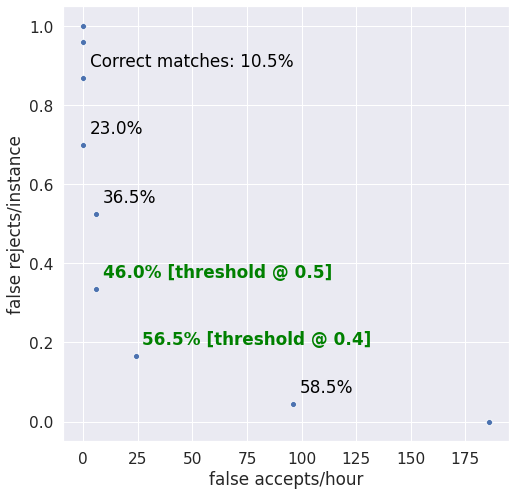

In [112]:
ax = sns.scatterplot(data=df, x="fa", y="fr");
ax.set(xlabel="false accepts/hour", ylabel="false rejects/instance");

for ix,row in df.iterrows():
    x = row.fa
    y = row.fr
     # https://matplotlib.org/3.1.1/tutorials/text/text_props.html
    correct_match_pct = row.cm*100
    if correct_match_pct == 10.5:
        ax.text(x + 3,y + .03, f"Correct matches: {correct_match_pct:.1f}%", horizontalalignment='left', size='medium', color='black', weight='normal')
    elif correct_match_pct == 46.0:
        ax.text(x + 3,y + .03, f"{correct_match_pct:.1f}% [threshold @ 0.5]", horizontalalignment='left', size='medium', color='green', weight='bold')
    elif np.isclose(x, 24):
        ax.text(x + 3,y + .03, f"{correct_match_pct:.1f}% [threshold @ 0.4]", horizontalalignment='left', size='medium', color='green', weight='bold')
    elif correct_match_pct > 10 and correct_match_pct < 59 and x < 150:
        ax.text(x + 3,y + .03, f"{correct_match_pct:.1f}%", horizontalalignment='left', size='medium', color='black', weight='normal')
    

plt.gcf().set_size_inches(8,8)

In [114]:
streaming = "../alignment_processing_en/train_5_11_silencepad/streaming_labels.txt"
with open(streaming, 'r') as fh:
    streaming = fh.readlines()

In [118]:
words = ["up", "down", "left", "right", "stop", "_unknown_", "_silence_"]
kws= {w:0 for w in words}
for line in streaming:
    kw = line.split(',')[0]
    kws[kw] += 1
kws

{'up': 28,
 'down': 18,
 'left': 25,
 'right': 35,
 'stop': 30,
 '_unknown_': 64,
 '_silence_': 0}

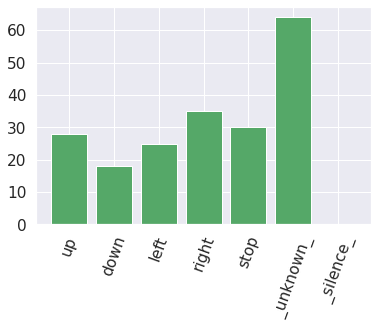

In [116]:
plt.bar(kws.keys(), kws.values(), color='g');
plt.xticks(rotation=70);

(0.0, 66.0)

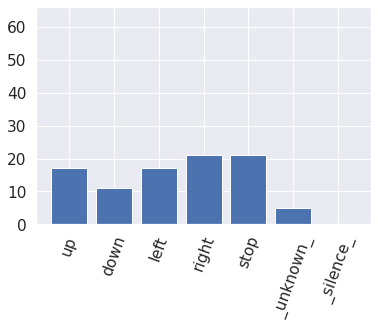

In [117]:
kws = {'up': 17, 'down': 11, 'left': 17, 'right': 21, 'stop': 21, '_unknown_': 5, '_silence_': 0}
plt.bar(kws.keys(), kws.values());
plt.xticks(rotation=70);
plt.gca().set_ylim(0,66)

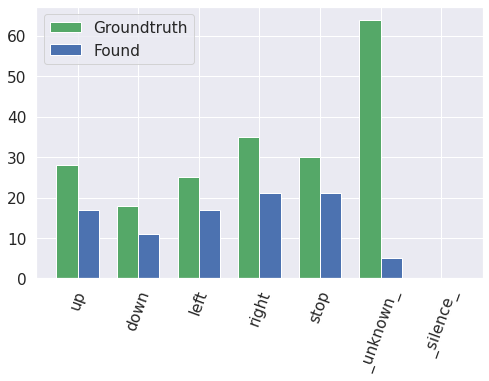

In [133]:
fig, ax = plt.subplots()
bar_width=0.35
ax.bar([i for i in range(len(kws.keys()))], kws.values(), bar_width, color='g', label="Groundtruth");
fkws = {'up': 17, 'down': 11, 'left': 17, 'right': 21, 'stop': 21, '_unknown_': 5, '_silence_': 0}
ax.bar([i + bar_width for i in range(len(fkws.keys()))] , fkws.values(), bar_width, label='Found');
#fig.xticks();
ax.set_xticks(np.arange(len(kws.keys())) + bar_width/2)
ax.set_xticklabels(kws.keys(), rotation=70)
ax.legend()
fig.set_size_inches(8,5)


## Stats module

In [1]:
import sys
sys.path.append("../tensorflow/tensorflow/examples/speech_commands/")

In [9]:
from test_streaming_accuracy import *

In [21]:
import numpy
import numpy as np
import tensorflow as tf
import argparse

from accuracy_utils import StreamingAccuracyStats
from recognize_commands import RecognizeCommands
from recognize_commands import RecognizeResult
from tensorflow.python.ops import io_ops


```bash
train_5_11 $ python ../tensorflow/tensorflow/examples/speech_commands/test_streaming_accuracy.py --wav=./streaming_test.wav --ground-truth=./streaming_labels.txt --verbose --model=./five.pb --labels=./train/tiny_conv_labels.txt --clip_duration_ms=1000 --detection_threshold=0.70 --average_window_ms=500 --suppression_ms=500 --time_tolerance_ms=1500 --detection-threshold=0.7
```


In [13]:
parser = argparse.ArgumentParser(description='test_streaming_accuracy')
parser.add_argument(
  '--wav', type=str, default='../train_5_11/streaming_test.wav', help='The wave file path to evaluate.')
parser.add_argument(
  '--ground-truth',
  type=str,
  default='../train_5_11/streaming_labels.txt',
  help='The ground truth file path corresponding to wav file.')
parser.add_argument(
  '--labels',
  type=str,
  default='../train_5_11/train/tiny_conv_labels.txt',
  help='The label file path containing all possible classes.')
parser.add_argument(
  '--model', type=str, default='../train_5_11/five.pb', help='The model used for inference')
parser.add_argument(
  '--input-names',
  type=str,
  nargs='+',
  default=['decoded_sample_data:0', 'decoded_sample_data:1'],
  help='Input name list involved in model graph.')
parser.add_argument(
  '--output-name',
  type=str,
  default='labels_softmax:0',
  help='Output name involved in model graph.')
parser.add_argument(
  '--clip-duration-ms',
  type=int,
  default=1000,
  help='Length of each audio clip fed into model.')
parser.add_argument(
  '--clip-stride-ms',
  type=int,
  default=30,
  help='Length of audio clip stride over main trap.')
parser.add_argument(
  '--average_window_duration_ms',
  type=int,
  default=500,
  help='Length of average window used for smoothing results.')
parser.add_argument(
  '--detection-threshold',
  type=float,
  default=0.7,
  help='The confidence for filtering unreliable commands')
parser.add_argument(
  '--suppression_ms',
  type=int,
  default=500,
  help='The time interval between every two adjacent commands')
parser.add_argument(
  '--time-tolerance-ms',
  type=int,
  default=1500,
  help='Time tolerance before and after the timestamp of this audio clip '
  'to match ground truth')
parser.add_argument(
  '--verbose',
  action='store_true',
  default=False,
  help='Whether to print streaming accuracy on stdout.')

# empty string to force parsing:
FLAGS, unparsed = parser.parse_known_args("")

In [26]:
x = set([1,2,3])
2 in x

True

In [14]:
FLAGS

Namespace(average_window_duration_ms=500, clip_duration_ms=1000, clip_stride_ms=30, detection_threshold=0.7, ground_truth='../train_5_11/streaming_labels.txt', input_names=['decoded_sample_data:0', 'decoded_sample_data:1'], labels='../train_5_11/train/tiny_conv_labels.txt', model='../train_5_11/five.pb', output_name='labels_softmax:0', suppression_ms=500, time_tolerance_ms=1500, verbose=False, wav='../train_5_11/streaming_test.wav')

In [15]:
label_list = read_label_file(FLAGS.labels)
sample_rate, data = read_wav_file(FLAGS.wav)
# Init instance of RecognizeCommands with given parameters.
recognize_commands = RecognizeCommands(
  labels=label_list,
  average_window_duration_ms=FLAGS.average_window_duration_ms,
  detection_threshold=FLAGS.detection_threshold,
  suppression_ms=FLAGS.suppression_ms,
  minimum_count=4)

# Init instance of StreamingAccuracyStats and load ground truth.
stats = StreamingAccuracyStats()
stats.read_ground_truth_file(FLAGS.ground_truth)
recognize_element = RecognizeResult()
all_found_words = []
data_samples = data.shape[0]
clip_duration_samples = int(FLAGS.clip_duration_ms * sample_rate / 1000)
clip_stride_samples = int(FLAGS.clip_stride_ms * sample_rate / 1000)
audio_data_end = data_samples - clip_duration_samples

In [19]:
stats._gt_occurrence[:50]

[['right', 1336],
 ['up', 4225],
 ['up', 7722],
 ['down', 10187],
 ['right', 13351],
 ['stop', 16507],
 ['down', 18627],
 ['up', 22670],
 ['_unknown_', 24534],
 ['_unknown_', 28889],
 ['left', 31641],
 ['_unknown_', 34529],
 ['_unknown_', 36983],
 ['right', 40191],
 ['down', 42800],
 ['_unknown_', 46749],
 ['up', 49079],
 ['stop', 52006],
 ['up', 54444],
 ['_unknown_', 57933],
 ['right', 61246],
 ['down', 63253],
 ['up', 66026],
 ['_unknown_', 70412],
 ['stop', 73816],
 ['up', 75350],
 ['right', 79522],
 ['_unknown_', 81434],
 ['_unknown_', 85404],
 ['stop', 87319],
 ['stop', 91046],
 ['_unknown_', 93881],
 ['right', 97913],
 ['down', 99530],
 ['stop', 103305],
 ['_unknown_', 105032],
 ['left', 108886],
 ['left', 111382],
 ['up', 115702],
 ['down', 118845],
 ['stop', 121607],
 ['_unknown_', 123840],
 ['_unknown_', 126419],
 ['_unknown_', 130025],
 ['right', 133460],
 ['up', 135845],
 ['_unknown_', 139787],
 ['left', 142650],
 ['left', 144303],
 ['up', 148115]]

In [27]:
list(filter(lambda o: o[1] < 18187, stats._gt_occurrence[:50]))

[['right', 1336],
 ['up', 4225],
 ['up', 7722],
 ['down', 10187],
 ['right', 13351],
 ['stop', 16507]]

# generate streaming wavs

In [16]:
sys.path.append("/home/mark/tinyspeech_harvard/tensorflow/tensorflow/examples/speech_commands/")

In [17]:
basedir = "/home/mark/tinyspeech_harvard/eleven_word_dataset/clips/"

wanted_words = ["up", "down", "left", "right", "stop"]

In [27]:
glob.glob("/home/mark/tinyspeech_harvard/eleven_word_dataset/clips/left/)

[]

In [24]:
clips = {w:[] for w in wanted_words}
for (k,v) in clips.items():
    print(basedir + k + os.path.sep + "*.wav")
    paths = glob.glob(basedir + k + os.path.sep + "*.wav")
    print(paths[0])
    v.extend(paths)

/home/mark/tinyspeech_harvard/eleven_word_dataset/clips/up/*.wav


IndexError: list index out of range

In [21]:
clips['up'][0]

IndexError: list index out of range